## Simple linear regression model set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Loading the data

In [2]:
data = pd.read_csv('machinelearndatabasic.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Creating the regression

In [4]:
x = data['SAT'] #input, feature, IV
y = data['GPA'] #output, target, DV

In [5]:
x.shape  #check vector length of input

(84,)

In [6]:
y.shape #check vector length of output

(84,)

In [7]:
x_matrix = x.values.reshape(-1,1) #for simple 1-feature regression models, the x variable must be reshaped to have >1 dimension.
x_matrix.shape

(84, 1)

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(x_matrix,y)

LinearRegression()

# Regression outputs

In [10]:
reg.score(x_matrix,y) #r-squared

0.40600391479679765

In [11]:
reg.coef_ #unstandardised coefficients

array([0.00165569])

In [12]:
reg.intercept_ #intercept

0.2750402996602803

## Making predictions with the model

In [13]:
test_data = pd.DataFrame(data=[1280,1468,1575,1740,1760,1820, 1950, 2090, 2155, 2200],columns=['SAT'])
test_data #create simulated data, in this case, some simulated SAT scores to derive GPA predictions

,SAT
0,1280
1,1468
2,1575
3,1740
4,1760
5,1820
6,1950
7,2090
8,2155
9,2200


In [14]:
test_data.shape #ensure the data are shaped properly
import warnings
warnings.filterwarnings("ignore", category=UserWarning) #did this to suppress a userwarning for privacy, despite getting the desired outputs

In [15]:
reg.predict(test_data) #predict method against the defined reg regression function defined earlier

array([2.394321  , 2.70559036, 2.88274898, 3.15593751, 3.18905127,
       3.28839255, 3.503632  , 3.73542832, 3.84304805, 3.91755401])

In [16]:
test_data['Predicted GPA'] = reg.predict(test_data) #tabulate the predictions for earlier understanding, and present it
test_data

,SAT,Predicted GPA
0,1280,2.394321
1,1468,2.705590
2,1575,2.882749
3,1740,3.155938
4,1760,3.189051
5,1820,3.288393
6,1950,3.503632
7,2090,3.735428
8,2155,3.843048
9,2200,3.917554


# plotting the regression

<function matplotlib.pyplot.show(close=None, block=None)>

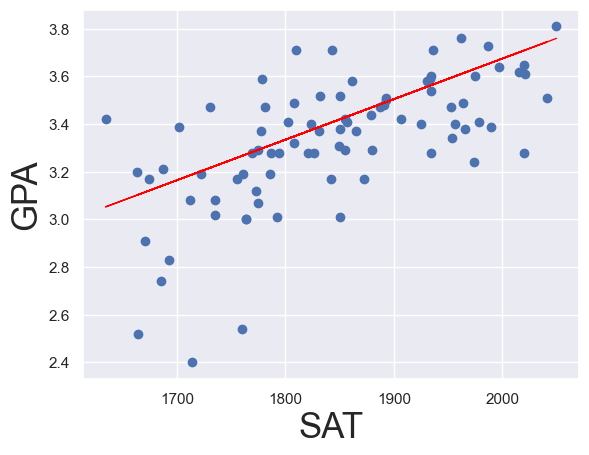

In [17]:
plt.scatter(x_matrix,y)
yhat = reg.coef_*x_matrix+reg.intercept_
yhat = 0.0017*x + 0.275
fig = plt.plot(x,yhat,lw=1, c='red', label ='regression line')
plt.xlabel('SAT', fontsize = 25)
plt.ylabel('GPA', fontsize = 25)
plt.show